In [49]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv("cleaned_sports_dataset (3).csv")
df.columns

Index(['Sl_no', 'Unnamed', 'Player', 'Team', 'Age', 'Height', 'Weight',
       'Position', 'Goals', 'Assists', 'YellowCards', 'RedCards',
       'PassCompletionRate', 'DistanceCovered', 'Sprints', 'ShotsOnTarget',
       'TacklesWon', 'CleanSheets', 'PlayerFatigue', 'MatchPressure',
       'InjuryHistory', 'TrainingHours', 'FatigueInjuryCorrelation',
       'PressurePerformanceImpact', 'EffectiveTraining', 'Season'],
      dtype='object')

In [51]:
df['EffectiveTrainingHours'] = df['TrainingHours'] * df['EffectiveTraining']

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
print("AA(Above Average): Players with a high performance ratio (>=0.005).\nA(Average): Players with a moderate performance ratio (>=0.002).\nBA(Below Average): Players with a low performance ratio.\nNone: Players with no performance ratio (either due to missing data or zero division).")
df['PerformanceRatio'] = df['Goals'] / df['EffectiveTrainingHours']
#df = df.dropna(subset=['PerformanceRatio'])
# Threshold=df['PerformanceRatio'].mean()=0.004
gold_threshold = 0.005
silver_threshold = 0.002
def categorize_performance(performance_ratio):
    if pd.isna(performance_ratio) or performance_ratio == 0.0:
        return 'None'
    elif performance_ratio >= gold_threshold:
        return 'AA'
    elif performance_ratio >= silver_threshold:
        return 'A'
    else:
        return 'BA'
df['PerformanceCategory'] = df['PerformanceRatio'].apply(categorize_performance)
le = LabelEncoder()
df['PerformanceCategoryEncoded'] = le.fit_transform(df['PerformanceCategory'])
features = ['EffectiveTrainingHours', 'Height', 'Weight', 'ShotsOnTarget','Goals']
X = df[features].fillna(0)
y = df['PerformanceCategoryEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
df['PredictedPerformanceCategoryEncoded'] = clf.predict(X)
df['PredictedPerformanceCategory'] = le.inverse_transform(df['PredictedPerformanceCategoryEncoded'])
df = df.drop(columns=['PredictedPerformanceCategoryEncoded','PerformanceCategoryEncoded','PerformanceCategory'])
print(df[['PerformanceRatio','PredictedPerformanceCategory']])


AA(Above Average): Players with a high performance ratio (>=0.005).
A(Average): Players with a moderate performance ratio (>=0.002).
BA(Below Average): Players with a low performance ratio.
None: Players with no performance ratio (either due to missing data or zero division).
       PerformanceRatio PredictedPerformanceCategory
0              0.002421                            A
1              0.000616                           BA
2              0.002938                            A
3              0.002476                            A
4              0.007768                           AA
...                 ...                          ...
16623          0.001968                           BA
16624          0.007115                           AA
16625          0.001291                           BA
16626          0.001443                           BA
16627          0.000000                         None

[16628 rows x 2 columns]


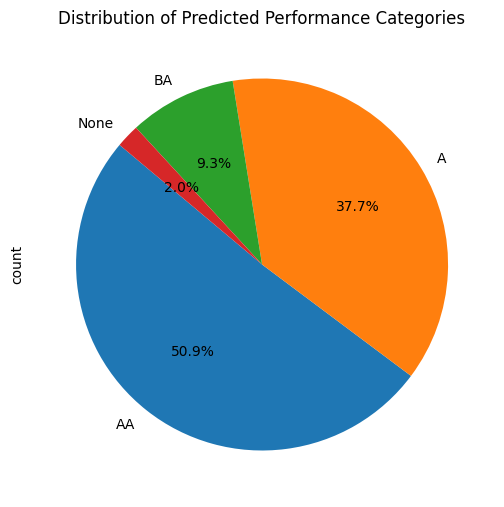

In [53]:
category_distribution = df['PredictedPerformanceCategory'].value_counts()
plt.figure(figsize=(6, 7))
category_distribution.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Performance Categories')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
df['FatiguePressureInteraction'] = df['PlayerFatigue'] * df['MatchPressure']
threshold = df['FatiguePressureInteraction'].mean()
df['InteractionCategory'] = df['FatiguePressureInteraction'].apply(lambda x: 'Affected' if x > threshold else 'Not Affected')
X = df[['FatiguePressureInteraction']]
y = df['InteractionCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
df['PredictedInteractionCategory'] = clf.predict(X)
df = df.drop(columns=['InteractionCategory'])
print("Threshold is: ",df['FatiguePressureInteraction'].mean())
print(df[['FatiguePressureInteraction', 'PredictedInteractionCategory']])


Threshold is:  24.579950172041613
       FatiguePressureInteraction PredictedInteractionCategory
0                       20.599707                 Not Affected
1                       91.268573                     Affected
2                       26.351782                     Affected
3                       22.150364                 Not Affected
4                        2.184261                 Not Affected
...                           ...                          ...
16623                   13.235221                 Not Affected
16624                   31.323392                     Affected
16625                   24.205759                 Not Affected
16626                   31.678936                     Affected
16627                    6.503427                 Not Affected

[16628 rows x 2 columns]


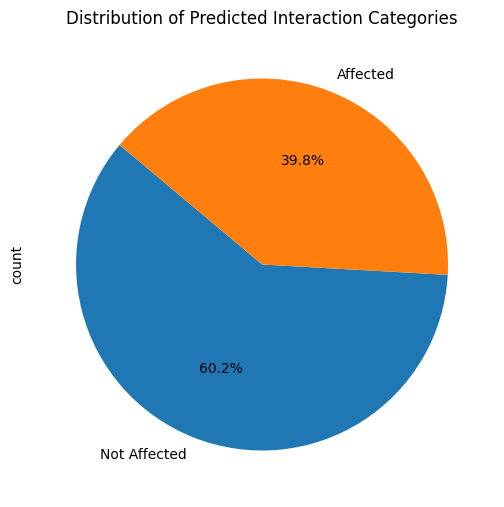

In [55]:
category_distribution = df['PredictedInteractionCategory'].value_counts()
plt.figure(figsize=(6, 7))
category_distribution.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Interaction Categories')
plt.show()

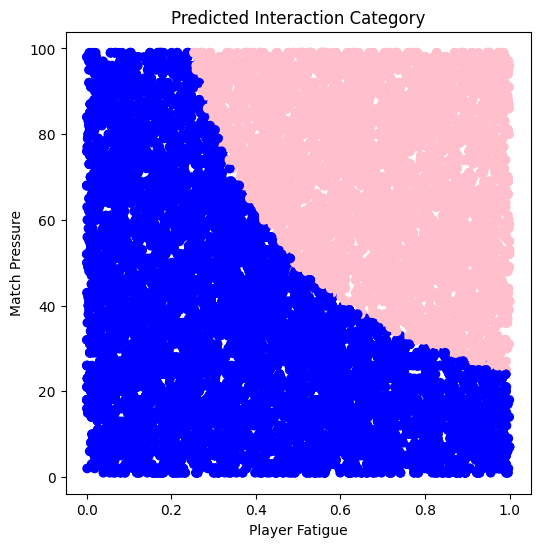

In [56]:
plt.figure(figsize=(6, 6))
colors = {'Affected': 'pink', 'Not Affected': 'blue'}
plt.scatter(df['PlayerFatigue'], df['MatchPressure'], c=df['PredictedInteractionCategory'].map(colors))
plt.xlabel('Player Fatigue')
plt.ylabel('Match Pressure')
plt.title('Predicted Interaction Category')
plt.show()


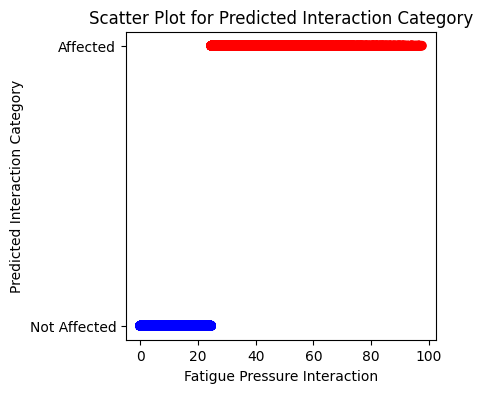

In [57]:
plt.figure(figsize=(4, 4))
colors = {'Affected': 'red', 'Not Affected': 'blue'}
plt.scatter(df['FatiguePressureInteraction'], df['PredictedInteractionCategory'], c=df['PredictedInteractionCategory'].map(colors))
plt.xlabel('Fatigue Pressure Interaction')
plt.ylabel('Predicted Interaction Category')
plt.title('Scatter Plot for Predicted Interaction Category')
plt.show()

In [58]:
df.to_csv("cleaned_sports_dataset.csv", index=False)
df

,Sl_no,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season,EffectiveTrainingHours,PerformanceRatio,PredictedPerformanceCategory,FatiguePressureInteraction,PredictedInteractionCategory
0,1,0.0,Player C,Team C,31,164.238236,64.899554,Defender,11,2,...,18.390595,1.864902,1.416667,247.074763,2022.0,4543.851827,0.002421,A,20.599707,Not Affected
1,2,1.0,Player D,Team C,22,164.489643,55.636159,Defender,2,16,...,15.017219,0.222857,5.410714,216.066045,2019.0,3244.711022,0.000616,BA,91.268573,Affected
2,3,2.0,Player A,Team C,27,208.241980,89.325850,Defender,19,13,...,17.966084,0.000000,5.410714,359.936777,2022.0,6466.654502,0.002938,A,26.351782,Affected
3,4,3.0,Player C,Team C,29,184.567349,54.390918,Forward,13,1,...,19.347216,0.077487,2.142857,271.347911,2020.0,5249.826764,0.002476,A,22.150364,Not Affected
4,5,4.0,Player C,Team C,27,192.172813,78.832881,Defender,6,8,...,6.884615,1.029822,5.410714,112.185952,2022.0,772.357051,0.007768,AA,2.184261,Not Affected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16623,16624,3190.0,Player B,Team B,27,164.120768,89.864429,Goalkeeper,11,9,...,17.282291,3.352402,5.410714,323.417940,2022.0,5589.402887,0.001968,BA,13.235221,Not Affected
16624,16625,3403.0,Player D,Team B,22,182.119023,83.702404,Goalkeeper,26,9,...,8.196836,3.352402,2.259259,445.788616,2022.0,3654.055964,0.007115,AA,31.323392,Affected
16625,16626,2464.0,Player A,Team C,34,194.381108,83.541854,Forward,3,9,...,8.211312,0.113794,3.750000,282.983389,2019.0,2323.664907,0.001291,BA,24.205759,Not Affected
16626,16627,3008.0,Player D,Team B,19,188.478929,89.593964,Defender,7,10,...,17.291954,3.352402,2.250000,280.472148,2019.0,4849.911416,0.001443,BA,31.678936,Affected
